In [61]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
glims = pd.read_csv('glims_clean.csv')
coordinates = pd.read_csv('LatLong_GLIMS.csv')

glims.head(5)


,Unnamed: 0,ANLYS_ID,GLAC_ID,AREA,DB_AREA,WIDTH,LENGTH,PRIMECLASS,MIN_ELEV,MEAN_ELEV,...,REC_STATUS,GLAC_NAME,WGMS_ID,LOCAL_ID,GLAC_STAT,GEOG_AREA,PARENT_ID,DATE,YEAR,MONTH
0,0,101215,G286929E46788S,12.42590,12.42920,0.0,4786.66,0,0,0,...,okay,None,None,CLGC-9,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9
1,1,101146,G286719E46755S,80.28420,80.31270,0.0,10225.60,0,0,0,...,okay,None,None,NPI-32,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9
2,8,101162,G286570E46600S,118.68100,118.73700,0.0,27183.10,0,0,0,...,okay,None,None,NPI-6,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9
3,14,101193,G286829E48560S,41.24430,41.25890,0.0,14192.90,0,0,0,...,okay,None,None,SPI-5,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9
4,15,101581,G287590E47667S,5.76485,5.76413,0.0,3161.54,0,0,0,...,okay,None,None,MSL-8,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9


In [62]:
glims = glims.merge(coordinates, how='left', left_on='GLAC_ID', right_on='glacier_id')
#only run this once, it will create duplicate merges 

In [73]:
glims.rename(columns={'X':'longitude', 'Y': 'latitude', 'glacier_id':'lat_glac_id', 'Unnamed: 3':'drop'}, inplace = True)

In [76]:
print(list(glims))
glims.head(5)
glims.drop(['lat_glac_id', 'drop'], axis=1) #drops unnecessary values from coordinates DF 

['Unnamed: 0', 'ANLYS_ID', 'GLAC_ID', 'AREA', 'DB_AREA', 'WIDTH', 'LENGTH', 'PRIMECLASS', 'MIN_ELEV', 'MEAN_ELEV', 'MAX_ELEV', 'SRC_DATE', 'REC_STATUS', 'GLAC_NAME', 'WGMS_ID', 'LOCAL_ID', 'GLAC_STAT', 'GEOG_AREA', 'PARENT_ID', 'DATE', 'YEAR', 'MONTH', 'longitude', 'latitude', 'lat_glac_id', 'drop']


,Unnamed: 0,ANLYS_ID,GLAC_ID,AREA,DB_AREA,WIDTH,LENGTH,PRIMECLASS,MIN_ELEV,MEAN_ELEV,...,WGMS_ID,LOCAL_ID,GLAC_STAT,GEOG_AREA,PARENT_ID,DATE,YEAR,MONTH,longitude,latitude
0,0,101215,G286929E46788S,12.425900,12.429200,0.0,4786.66,0,0,0,...,None,CLGC-9,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9,-73.071,-46.788
1,1,101146,G286719E46755S,80.284200,80.312700,0.0,10225.60,0,0,0,...,None,NPI-32,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9,-73.281,-46.755
2,8,101162,G286570E46600S,118.681000,118.737000,0.0,27183.10,0,0,0,...,None,NPI-6,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9,-73.430,-46.600
3,14,101193,G286829E48560S,41.244300,41.258900,0.0,14192.90,0,0,0,...,None,SPI-5,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9,-73.171,-48.560
4,15,101581,G287590E47667S,5.764850,5.764130,0.0,3161.54,0,0,0,...,None,MSL-8,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9,-72.410,-47.667
5,16,101257,G290552E54592S,22.610500,22.557300,0.0,7782.78,0,0,0,...,None,CD-22,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9,-69.448,-54.592
6,17,101170,G286431E47184S,265.866000,266.011000,0.0,40678.70,0,0,0,...,14,NPI-14,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9,-73.569,-47.184
7,18,101270,G290587E54704S,7.897220,7.878460,0.0,4317.78,0,0,0,...,None,CD-35,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9,-69.413,-54.704
8,19,101153,G286716E46597S,87.815800,87.811900,0.0,20432.20,0,0,0,...,None,NPI-38,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9,-73.284,-46.597
9,21,101752,G286599E47361S,77.225300,77.164700,0.0,24776.40,0,0,0,...,None,NPI-21,exists,Antarctic Peninsula,NaN,2001-08-04 00:00:00,2001,8,-73.401,-47.361


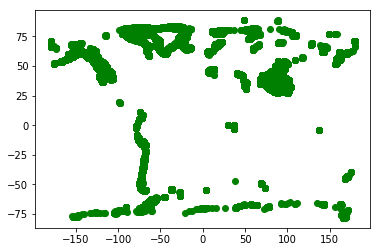

In [80]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.scatter(glims['longitude'], glims['latitude'], color='green', marker='o')

In [ ]:
#export as a CSV 